In [9]:
import scipy as sp
import numpy as np
import time

try:
    from localgraphclustering import *
except:
    # when the package is not installed, import the local version instead. 
    # the notebook must be placed in the original "notebooks/" folder
    sys.path.append("../")
    from localgraphclustering import *
    
from graph_tool.all import * 

import time

## Load data

In [10]:
g = GraphLocal('datasets/JohnsHopkins.graphml','graphml')

/usr/local/lib/python3.7/site-packages/localgraphclustering/GraphLocal.py:217: UserWarning:

Loading a graphml is not efficient, we suggest using an edgelist format for this API.



## Example on how to find all clusters in graph using local graph clustering

In [18]:
start = time.time()
# Compute the embeddings X and the pairwise distance matrix Z.
X,Z = compute_all_embeddings_and_distances(g,rho_list=[1.0e-5,1.0e-1],nsamples_from_rho=1,njobs=6)
end = time.time()
print(end - start)

20.193931102752686


In [19]:
start = time.time()
# Find the clusters
labels = compute_k_clusters(nclusters=4,Z=Z)
end = time.time()
print(end - start)

1.1158828735351562


## Visualize the output

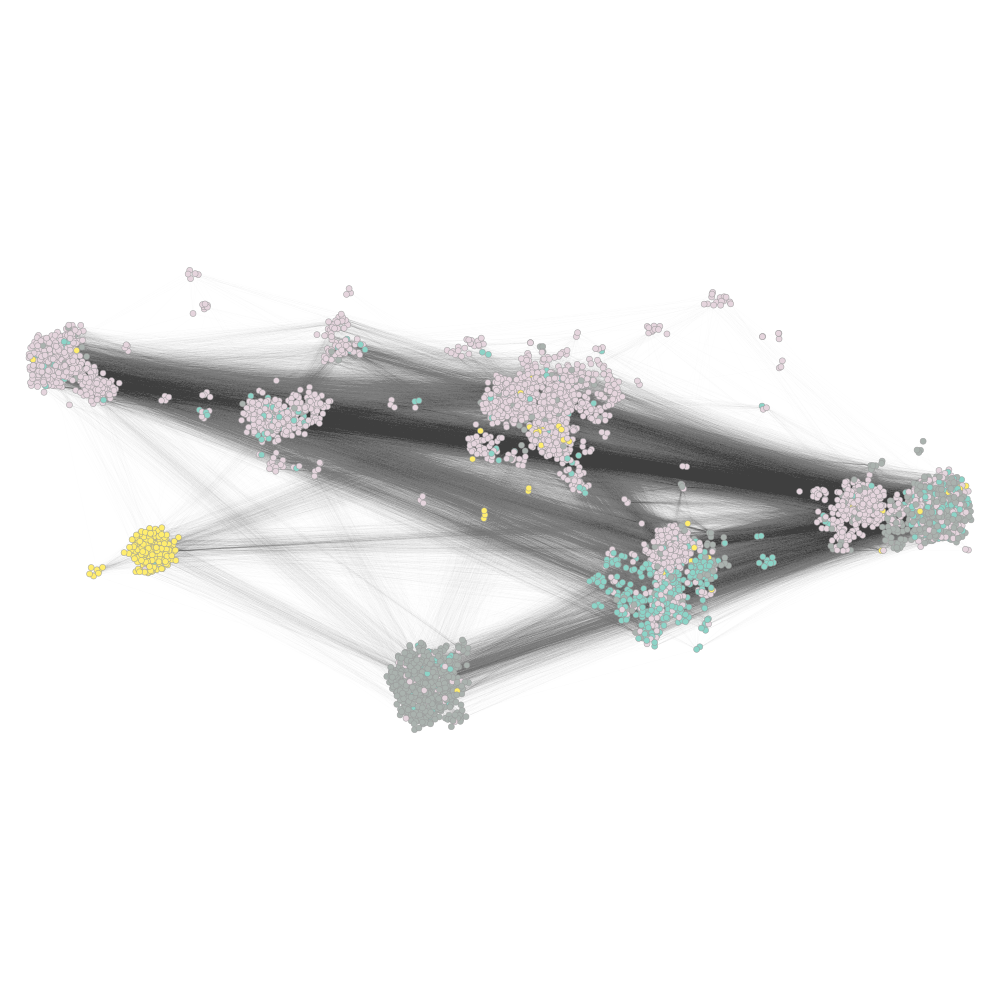

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x151fbb5c0, at 0x1461edac8>

In [20]:
g_gtool = load_graph('datasets/JohnsHopkins.graphml')
remove_self_loops(g_gtool)

# Load pre-computed coordinates for nodes.
ld_coord = np.loadtxt('./datasets/JohnHopkins_coord.xy', dtype = 'Float64')
idx = np.argsort(ld_coord[:,0])

pos = g_gtool.new_vertex_property("vector<double>")
for i in range(g_gtool.num_vertices()):
    pos[i] = ld_coord[idx[i],1:3]
    
n = g._num_vertices

temp = np.zeros(n)
temp = temp + 3

temp2 = np.zeros(n, dtype=int)

counter = 0

for i in range(n):
        
    temp[i] = 6
    temp2[i] = labels[i] 

node_size = g_gtool.new_vertex_property("double",temp)

node_colours = g_gtool.new_vertex_property("int",temp2)

graph_draw(g_gtool, pos, output_size=(1000, 1000),
            vertex_size=node_size, 
            vertex_fill_color=node_colours,
            edge_pen_width=0.1,
            edge_color = [0.0, 0, 0, 0.05]
            )

## Another example

In [11]:
# This example computes the embeddings and the clusters in one function. It is not recommended when we want to experiment
# with multiple parameters nclusters. Look at the fist example above for a faster approach.
labels = find_k_clusters(g,nclusters=3,rho_list=[1.0e-5,1.0e-1],nsamples_from_rho=1,njobs=6)

## Visualize the output

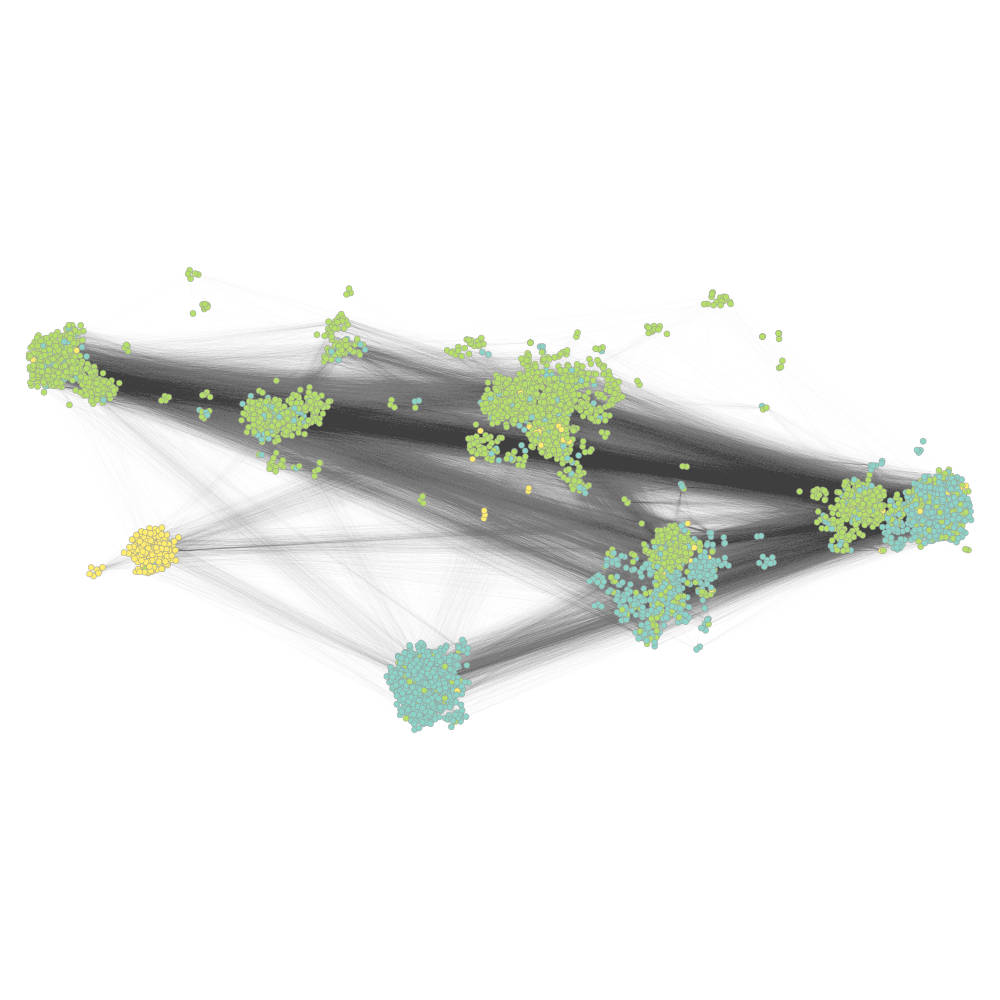

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x138a418d0, at 0x142ed3588>

In [12]:
g_gtool = load_graph('datasets/JohnsHopkins.graphml')
remove_self_loops(g_gtool)

# Load pre-computed coordinates for nodes.
ld_coord = np.loadtxt('./datasets/JohnHopkins_coord.xy', dtype = 'Float64')
idx = np.argsort(ld_coord[:,0])

pos = g_gtool.new_vertex_property("vector<double>")
for i in range(g_gtool.num_vertices()):
    pos[i] = ld_coord[idx[i],1:3]
    
n = g._num_vertices

temp = np.zeros(n)
temp = temp + 3

temp2 = np.zeros(n, dtype=int)

counter = 0

for i in range(n):
        
    temp[i] = 6
    temp2[i] = labels[i] 

node_size = g_gtool.new_vertex_property("double",temp)

node_colours = g_gtool.new_vertex_property("int",temp2)

graph_draw(g_gtool, pos, output_size=(1000, 1000),
            vertex_size=node_size, 
            vertex_fill_color=node_colours,
            edge_pen_width=0.1,
            edge_color = [0.0, 0, 0, 0.05]
            )

In [6]:
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import Birch
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

In [24]:
clustering = AffinityPropagation(damping=0.5, max_iter=500, convergence_iter=100, copy=True, preference=None, verbose=False, affinity='precomputed').fit(Z)
labels = clustering.labels_

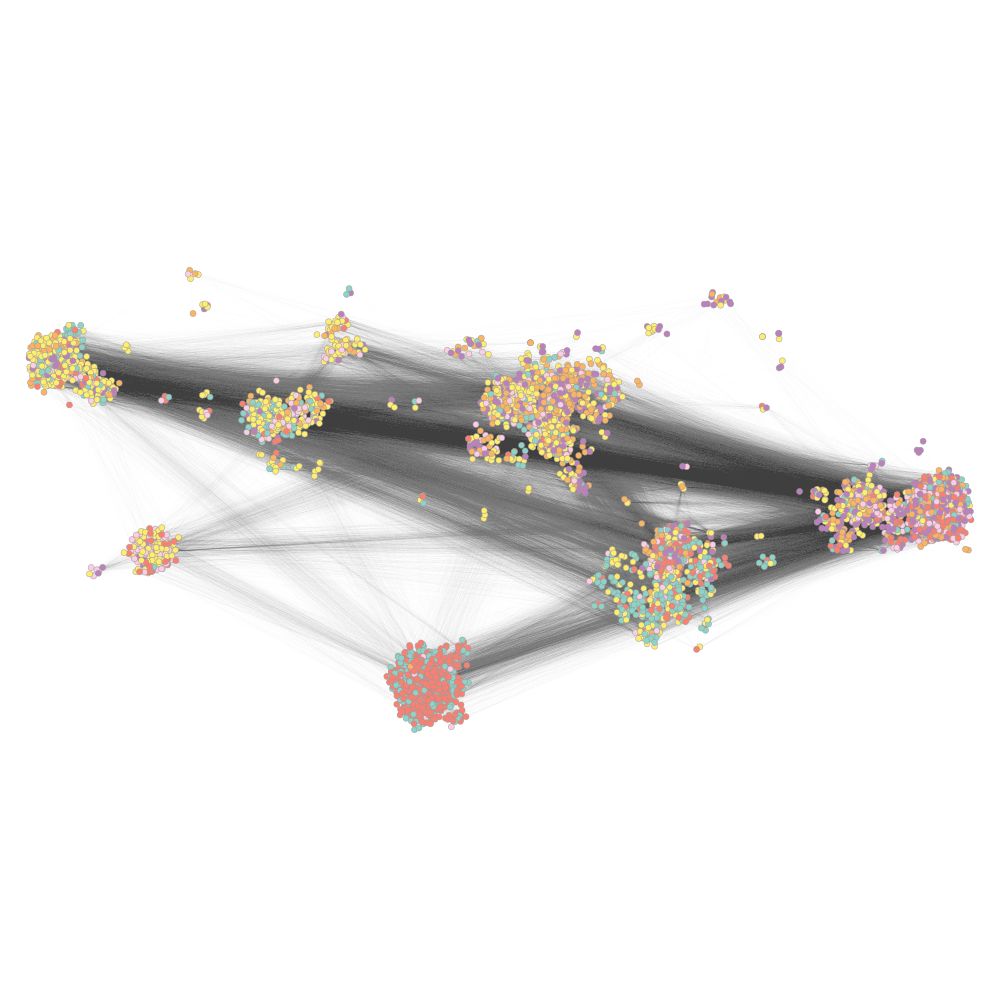

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x144900208, at 0x14a62f438>

In [25]:
g_gtool = load_graph('datasets/JohnsHopkins.graphml')
remove_self_loops(g_gtool)

# Load pre-computed coordinates for nodes.
ld_coord = np.loadtxt('./datasets/JohnHopkins_coord.xy', dtype = 'Float64')
idx = np.argsort(ld_coord[:,0])

pos = g_gtool.new_vertex_property("vector<double>")
for i in range(g_gtool.num_vertices()):
    pos[i] = ld_coord[idx[i],1:3]
    
n = g._num_vertices

temp = np.zeros(n)
temp = temp + 3

temp2 = np.zeros(n, dtype=int)

counter = 0

for i in range(n):
        
    temp[i] = 6
    temp2[i] = labels[i] 

node_size = g_gtool.new_vertex_property("double",temp)

node_colours = g_gtool.new_vertex_property("int",temp2)

graph_draw(g_gtool, pos, output_size=(1000, 1000),
            vertex_size=node_size, 
            vertex_fill_color=node_colours,
            edge_pen_width=0.1,
            edge_color = [0.0, 0, 0, 0.05]
            )

In [35]:
start = time.time()
clustering = Birch(threshold=0.1, branching_factor=50, n_clusters=4, compute_labels=True, copy=True).fit(X)
labels = clustering.labels_
end = time.time()
print(end - start)

80.7080020904541


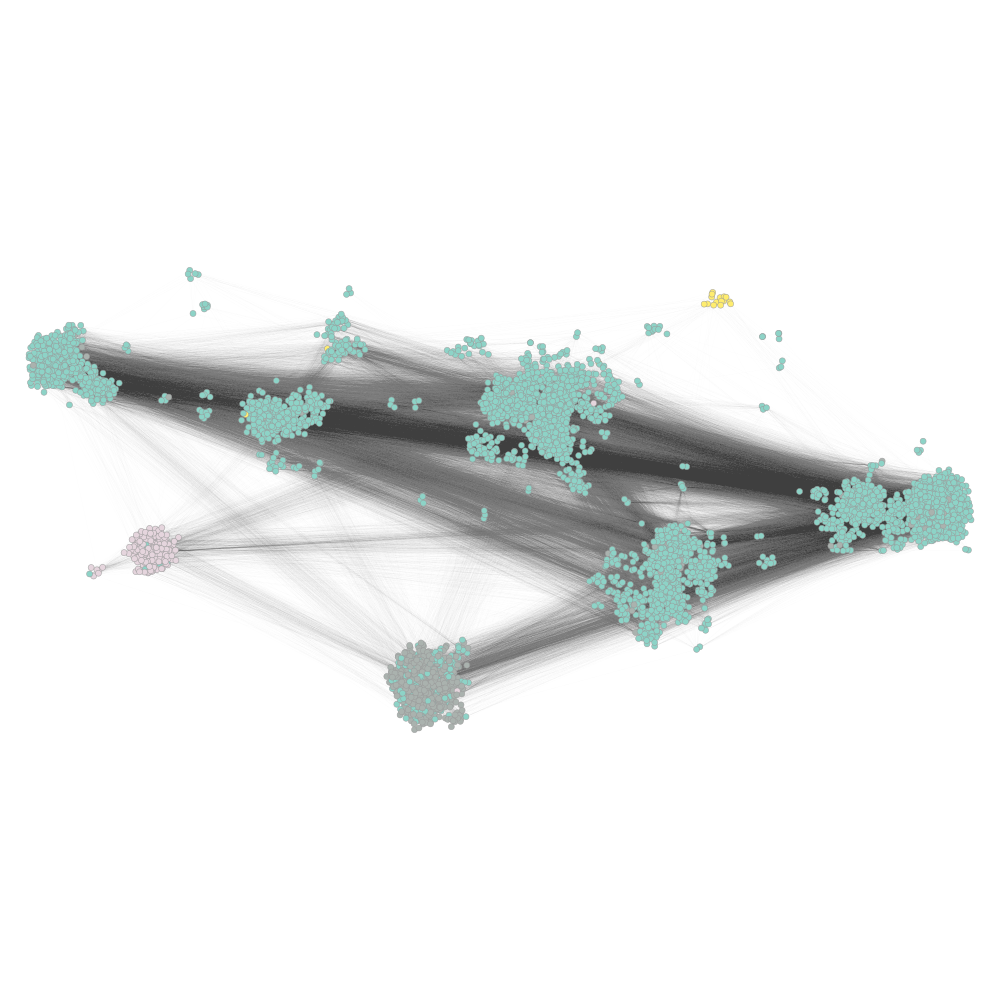

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x131a2c400, at 0x144900198>

In [36]:
g_gtool = load_graph('datasets/JohnsHopkins.graphml')
remove_self_loops(g_gtool)

# Load pre-computed coordinates for nodes.
ld_coord = np.loadtxt('./datasets/JohnHopkins_coord.xy', dtype = 'Float64')
idx = np.argsort(ld_coord[:,0])

pos = g_gtool.new_vertex_property("vector<double>")
for i in range(g_gtool.num_vertices()):
    pos[i] = ld_coord[idx[i],1:3]
    
n = g._num_vertices

temp = np.zeros(n)
temp = temp + 3

temp2 = np.zeros(n, dtype=int)

counter = 0

for i in range(n):
        
    temp[i] = 6
    temp2[i] = labels[i] 

node_size = g_gtool.new_vertex_property("double",temp)

node_colours = g_gtool.new_vertex_property("int",temp2)

graph_draw(g_gtool, pos, output_size=(1000, 1000),
            vertex_size=node_size, 
            vertex_fill_color=node_colours,
            edge_pen_width=0.1,
            edge_color = [0.0, 0, 0, 0.05]
            )

In [71]:
start = time.time()
clustering = MiniBatchKMeans(n_clusters=4, init='k-means++', max_iter=10000, batch_size=5000, verbose=0, compute_labels=True, random_state=None, tol=0.0, max_no_improvement=1000, init_size=None, n_init=3, reassignment_ratio=0.01).fit(X)
labels = clustering.labels_
end = time.time()
print(end - start)

98.44036197662354


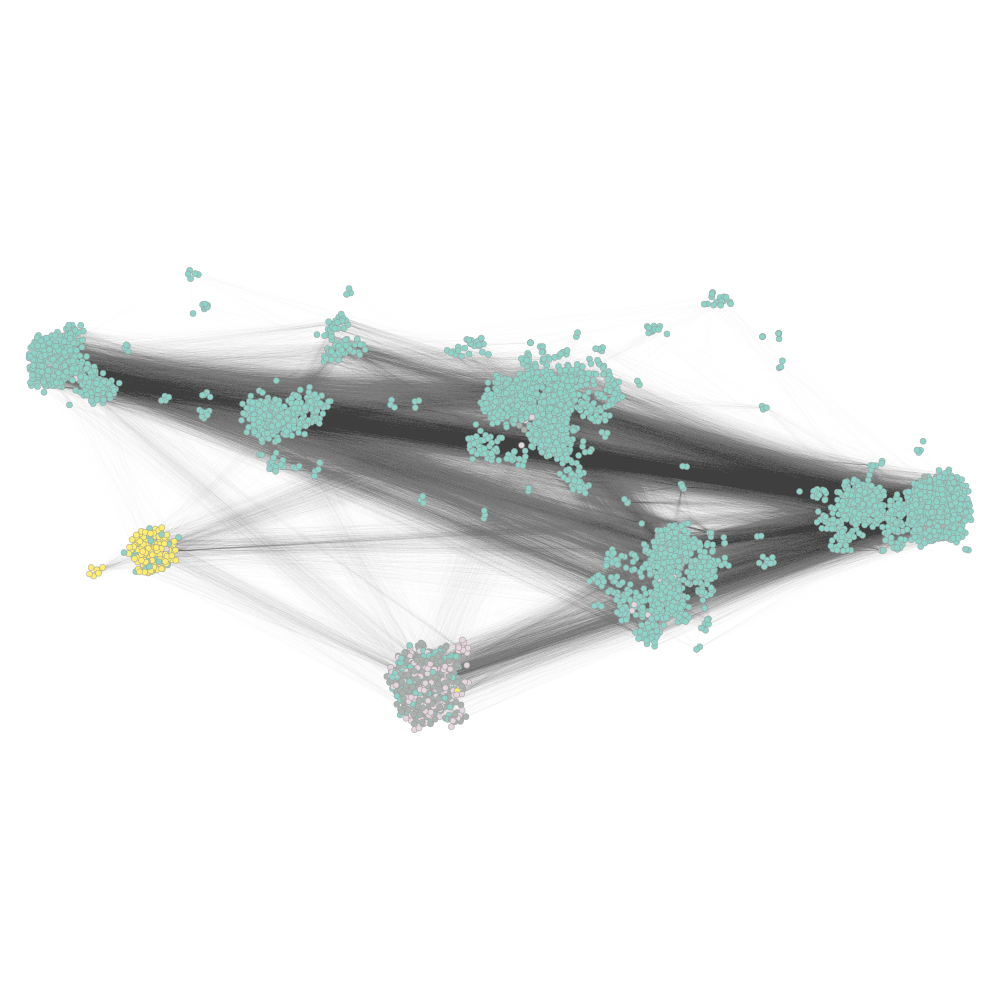

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x14d154ef0, at 0x14d1918d0>

In [72]:
g_gtool = load_graph('datasets/JohnsHopkins.graphml')
remove_self_loops(g_gtool)

# Load pre-computed coordinates for nodes.
ld_coord = np.loadtxt('./datasets/JohnHopkins_coord.xy', dtype = 'Float64')
idx = np.argsort(ld_coord[:,0])

pos = g_gtool.new_vertex_property("vector<double>")
for i in range(g_gtool.num_vertices()):
    pos[i] = ld_coord[idx[i],1:3]
    
n = g._num_vertices

temp = np.zeros(n)
temp = temp + 3

temp2 = np.zeros(n, dtype=int)

counter = 0

for i in range(n):
        
    temp[i] = 6
    temp2[i] = labels[i] 

node_size = g_gtool.new_vertex_property("double",temp)

node_colours = g_gtool.new_vertex_property("int",temp2)

graph_draw(g_gtool, pos, output_size=(1000, 1000),
            vertex_size=node_size, 
            vertex_fill_color=node_colours,
            edge_pen_width=0.1,
            edge_color = [0.0, 0, 0, 0.05]
            )

In [8]:
import markov_clustering as mc

In [28]:
result = mc.run_mcl(X, inflation=1.9) 

In [29]:
clusters = mc.get_clusters(result)

In [67]:
start = time.time()
state = minimize_blockmodel_dl(g_gtool,B_min=4,B_max=4)
end = time.time()
print(end - start)

54.73943305015564


In [68]:
b = state.get_blocks()
labels = np.array(b.a)

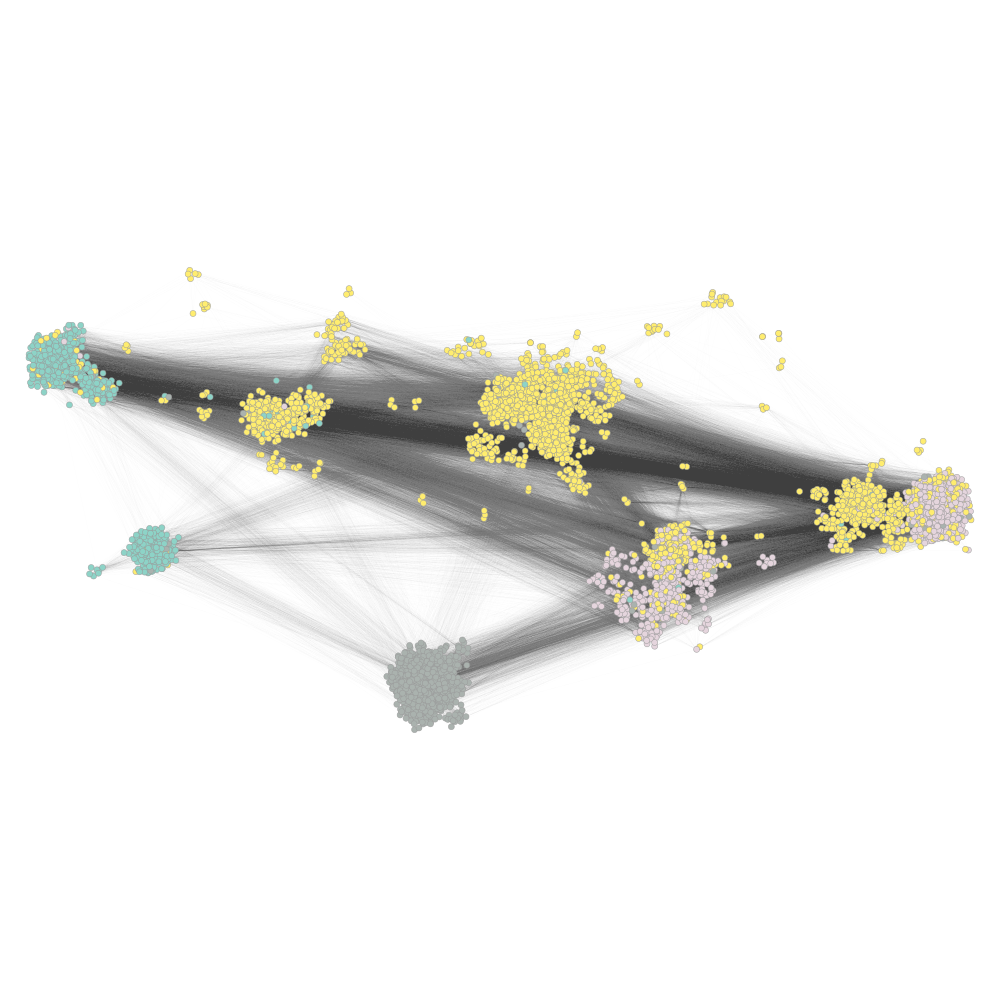

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x14b9f1a90, at 0x13c4690f0>

In [69]:
g_gtool = load_graph('datasets/JohnsHopkins.graphml')
remove_self_loops(g_gtool)

# Load pre-computed coordinates for nodes.
ld_coord = np.loadtxt('./datasets/JohnHopkins_coord.xy', dtype = 'Float64')
idx = np.argsort(ld_coord[:,0])

pos = g_gtool.new_vertex_property("vector<double>")
for i in range(g_gtool.num_vertices()):
    pos[i] = ld_coord[idx[i],1:3]
    
n = g._num_vertices

temp = np.zeros(n)
temp = temp + 3

temp2 = np.zeros(n, dtype=int)

counter = 0

for i in range(n):
        
    temp[i] = 6
    temp2[i] = labels[i] 

node_size = g_gtool.new_vertex_property("double",temp)

node_colours = g_gtool.new_vertex_property("int",temp2)

graph_draw(g_gtool, pos, output_size=(1000, 1000),
            vertex_size=node_size, 
            vertex_fill_color=node_colours,
            edge_pen_width=0.1,
            edge_color = [0.0, 0, 0, 0.05]
            )

In [70]:
hierarchy_minimize_args = {'epsilon':1.0e-2}

start = time.time()
state = minimize_nested_blockmodel_dl(g_gtool,B_min=4,B_max=4,hierarchy_minimize_args=hierarchy_minimize_args)
end = time.time()
print(end - start)

58.05697298049927


In [77]:
b = state.get_bs()[0]
labels = np.array(b)

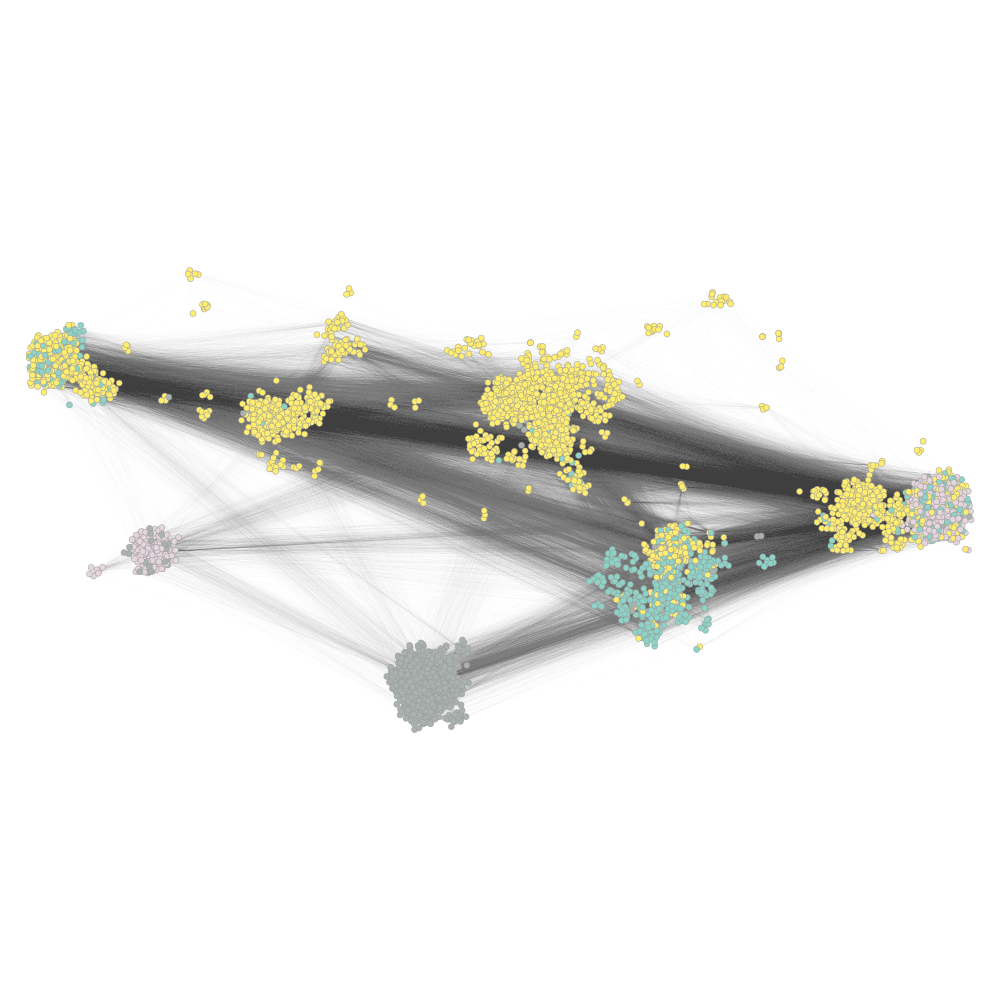

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x13c469668, at 0x151ba7860>

In [78]:
g_gtool = load_graph('datasets/JohnsHopkins.graphml')
remove_self_loops(g_gtool)

# Load pre-computed coordinates for nodes.
ld_coord = np.loadtxt('./datasets/JohnHopkins_coord.xy', dtype = 'Float64')
idx = np.argsort(ld_coord[:,0])

pos = g_gtool.new_vertex_property("vector<double>")
for i in range(g_gtool.num_vertices()):
    pos[i] = ld_coord[idx[i],1:3]
    
n = g._num_vertices

temp = np.zeros(n)
temp = temp + 3

temp2 = np.zeros(n, dtype=int)

counter = 0

for i in range(n):
        
    temp[i] = 6
    temp2[i] = labels[i] 

node_size = g_gtool.new_vertex_property("double",temp)

node_colours = g_gtool.new_vertex_property("int",temp2)

graph_draw(g_gtool, pos, output_size=(1000, 1000),
            vertex_size=node_size, 
            vertex_fill_color=node_colours,
            edge_pen_width=0.1,
            edge_color = [0.0, 0, 0, 0.05]
            )

In [8]:
def to_graph_tool(adj):
    g = Graph(directed=False)
    edge_weights = g.new_edge_property('double')
    g.edge_properties['weight'] = edge_weights
    nnz = np.nonzero(np.triu(adj,1))
    nedges = len(nnz[0])
    g.add_edge_list(np.hstack([np.transpose(nnz),np.reshape(adj[nnz],(nedges,1))]),eprops=[edge_weights])
    return g


def to_graph_tool_slow(adj):
    g = Graph(directed=False)
    edge_weights = g.new_edge_property('double')
    g.edge_properties['weight'] = edge_weights
    num_vertices = len(adj)
    for i in range(0,num_vertices):
        for j in range(i+1,num_vertices):
            if adj[i,j]!=0:
                e = g.add_edge(i,j)
                edge_weights[e] = adj[i,j]
    return g

start = time.time()

new_adj = X.transpose()*X
new_adj = new_adj.tocoo()
new_adj = new_adj.toarray()

#g2 = to_graph_tool(new_adj)
g2 = to_graph_tool_slow(new_adj)
    
end = time.time()
print(end - start)

2582.005249977112


In [ ]:
start = time.time()
state = minimize_blockmodel_dl(g2,B_min=4,B_max=4)
end = time.time()
print(end - start)

In [ ]:
b = state.get_blocks()
labels = np.array(b.a)

In [ ]:
g_gtool = load_graph('datasets/JohnsHopkins.graphml')
remove_self_loops(g_gtool)

# Load pre-computed coordinates for nodes.
ld_coord = np.loadtxt('./datasets/JohnHopkins_coord.xy', dtype = 'Float64')
idx = np.argsort(ld_coord[:,0])

pos = g_gtool.new_vertex_property("vector<double>")
for i in range(g_gtool.num_vertices()):
    pos[i] = ld_coord[idx[i],1:3]
    
n = g._num_vertices

temp = np.zeros(n)
temp = temp + 3

temp2 = np.zeros(n, dtype=int)

counter = 0

for i in range(n):
        
    temp[i] = 6
    temp2[i] = labels[i] 

node_size = g_gtool.new_vertex_property("double",temp)

node_colours = g_gtool.new_vertex_property("int",temp2)

graph_draw(g_gtool, pos, output_size=(1000, 1000),
            vertex_size=node_size, 
            vertex_fill_color=node_colours,
            edge_pen_width=0.1,
            edge_color = [0.0, 0, 0, 0.05]
            )

In [ ]:
hierarchy_minimize_args = {'epsilon':1.0e-2}
state_args=dict(recs=[g2.ep.weight],rec_types=["real-exponential"])
mcmc_args = {'beta':10000}
    
start = time.time()
state = minimize_nested_blockmodel_dl(g2,B_min=4,B_max=4,mcmc_args=mcmc_args,hierarchy_minimize_args=hierarchy_minimize_args,state_args=state_args)
end = time.time()
print(end - start)

In [ ]:
b = state.get_blocks()
labels = np.array(b.a)

In [ ]:
g_gtool = load_graph('datasets/JohnsHopkins.graphml')
remove_self_loops(g_gtool)

# Load pre-computed coordinates for nodes.
ld_coord = np.loadtxt('./datasets/JohnHopkins_coord.xy', dtype = 'Float64')
idx = np.argsort(ld_coord[:,0])

pos = g_gtool.new_vertex_property("vector<double>")
for i in range(g_gtool.num_vertices()):
    pos[i] = ld_coord[idx[i],1:3]
    
n = g._num_vertices

temp = np.zeros(n)
temp = temp + 3

temp2 = np.zeros(n, dtype=int)

counter = 0

for i in range(n):
        
    temp[i] = 6
    temp2[i] = labels[i] 

node_size = g_gtool.new_vertex_property("double",temp)

node_colours = g_gtool.new_vertex_property("int",temp2)

graph_draw(g_gtool, pos, output_size=(1000, 1000),
            vertex_size=node_size, 
            vertex_fill_color=node_colours,
            edge_pen_width=0.1,
            edge_color = [0.0, 0, 0, 0.05]
            )

In [14]:
new_adj = X.transpose()*X

In [15]:
new_adj

<5157x5157 sparse matrix of type '<class 'numpy.float64'>'
	with 2927229 stored elements in Compressed Sparse Column format>

In [16]:
24307577

24307577

In [17]:
5157**2

26594649